In [1]:
import urllib.request

fp = urllib.request.urlopen("ftp://ftp.ensembl.org/pub/release-101/regulation/homo_sapiens/Peaks/")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

data = mystr.split("\n")
cellDict = {}

In [2]:
for item in data:
    if item != "" and item != "\n":
        cell = item.split(" ")[-1][:-1]
        cellDict[cell] = []
        fp = urllib.request.urlopen("ftp://ftp.ensembl.org/pub/release-101/regulation/homo_sapiens/Peaks/"+cell+"/")
        mybytes = fp.read()
        mystr = mybytes.decode("utf8")
        fp.close()
        
        data2 = mystr.split("\n")
        for item in data2:
            item = item.split(" ")[-1][:-1]
            
            cellDict[cell].append(item)
        
        

In [3]:
for item in cellDict:
    print(item, cellDict[item])
    

A549 ['BCL3', 'BHLHE40', 'CEBPB', 'CTCF', 'E2F6', 'ELK1', 'EP300', 'ESRRA', 'FOSL2', 'GATA3', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'HDAC2', 'JUN', 'Junb', 'KDM1A', 'KDM5A', 'MAFK', 'MYC', 'Max', 'NFE2L2', 'NR3C1', 'Pbx3', 'REST', 'RFX5', 'RNF2', 'Rad21', 'SIN3A', 'SREBF1', 'SREBF2', 'TEAD4', 'USF2', 'ZC3H11A', '']
A673 ['CTCF', 'DNase1', 'EZH2', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
B ['CTCF', 'DNase1', 'EZH2', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
B_PB ['DNase1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
CD14_monocyte_1 ['CTCF', 'DNase1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K9ac', 'H3K9me3', 'H4K20me1', '']
CD14_monocyte_PB ['DNase1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
CD38__naive_B_CB ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K9me3', '']
CD38__naive_B_VB ['H3K27me3', 'H3K36me3', 'H3K4me1',

In [4]:


#to know the full HM to create dictionaries
hmList = []
for cell in cellDict:
    for item in cellDict[cell]:
        if item != "":
            if "H1" == item[:2] or "H2" == item[:2] or "H3" == item[:2] or "H4" == item[:2]:
                if item not in hmList:
                    hmList.append(item)
                    
for hm in hmList:
    print("\t\""+hm.lower()+"\":False")
            
            

	"h3k27ac":False
	"h3k27me3":False
	"h3k36me3":False
	"h3k4me1":False
	"h3k4me3":False
	"h3k9me3":False
	"h3k4me2":False
	"h3k9ac":False
	"h4k20me1":False
	"h2ak5ac":False
	"h2bk120ac":False
	"h2bk12ac":False
	"h2bk15ac":False
	"h2bk20ac":False
	"h2bk5ac":False
	"h3k14ac":False
	"h3k18ac":False
	"h3k23ac":False
	"h3k23me2":False
	"h3k4ac":False
	"h3k56ac":False
	"h3k79me1":False
	"h3k79me2":False
	"h4k5ac":False
	"h4k8ac":False
	"h4k91ac":False
	"h2az":False
	"h3k9me1":False
	"h2ak9ac":False
	"h2a.zac":False
	"h4k12ac":False


In [5]:

finalDict = {}
for cell in cellDict:
    finalDict[cell] = {
        "dnase1": 0, 
        "h3k27ac":0,
        "h3k27me3":0,
        "h3k36me3":0,
        "h3k4me1":0,
        "h3k4me3":0,
        "h3k9me3":0,
        "h3k4me2":0,
        "h3k9ac":0,
        "h4k20me1":0,
        "h2ak5ac":0,
        "h2bk120ac":0,
        "h2bk12ac":0,
        "h2bk15ac":0,
        "h2bk20ac":0,
        "h2bk5ac":0,
        "h3k14ac":0,
        "h3k18ac":0,
        "h3k23ac":0,
        "h3k23me2":0,
        "h3k4ac":0,
        "h3k56ac":0,
        "h3k79me1":0,
        "h3k79me2":0,
        "h4k5ac":0,
        "h4k8ac":0,
        "h4k91ac":0,
        "h2az":0,
        "h3k9me1":0,
        "h2ak9ac":0,
        "h2a.zac":0,
        "h4k12ac":0,
        "ezh2":0,
        "yy1":0, 
        "ctcf":0}#,
#        "TFs": 0}
    for item in cellDict[cell]:
        if item != "" and "pol" not in item.lower():
                if item.lower() in finalDict[cell]:
                    finalDict[cell][item.lower()] = 1
#                else:
#                    finalDict[cell]["TFs"] += 1
            


In [6]:
import pandas as pd
df = pd.DataFrame.from_dict(finalDict)
df2 = df.transpose()
df2.to_csv("data_ensembl.tsv", sep="\t")

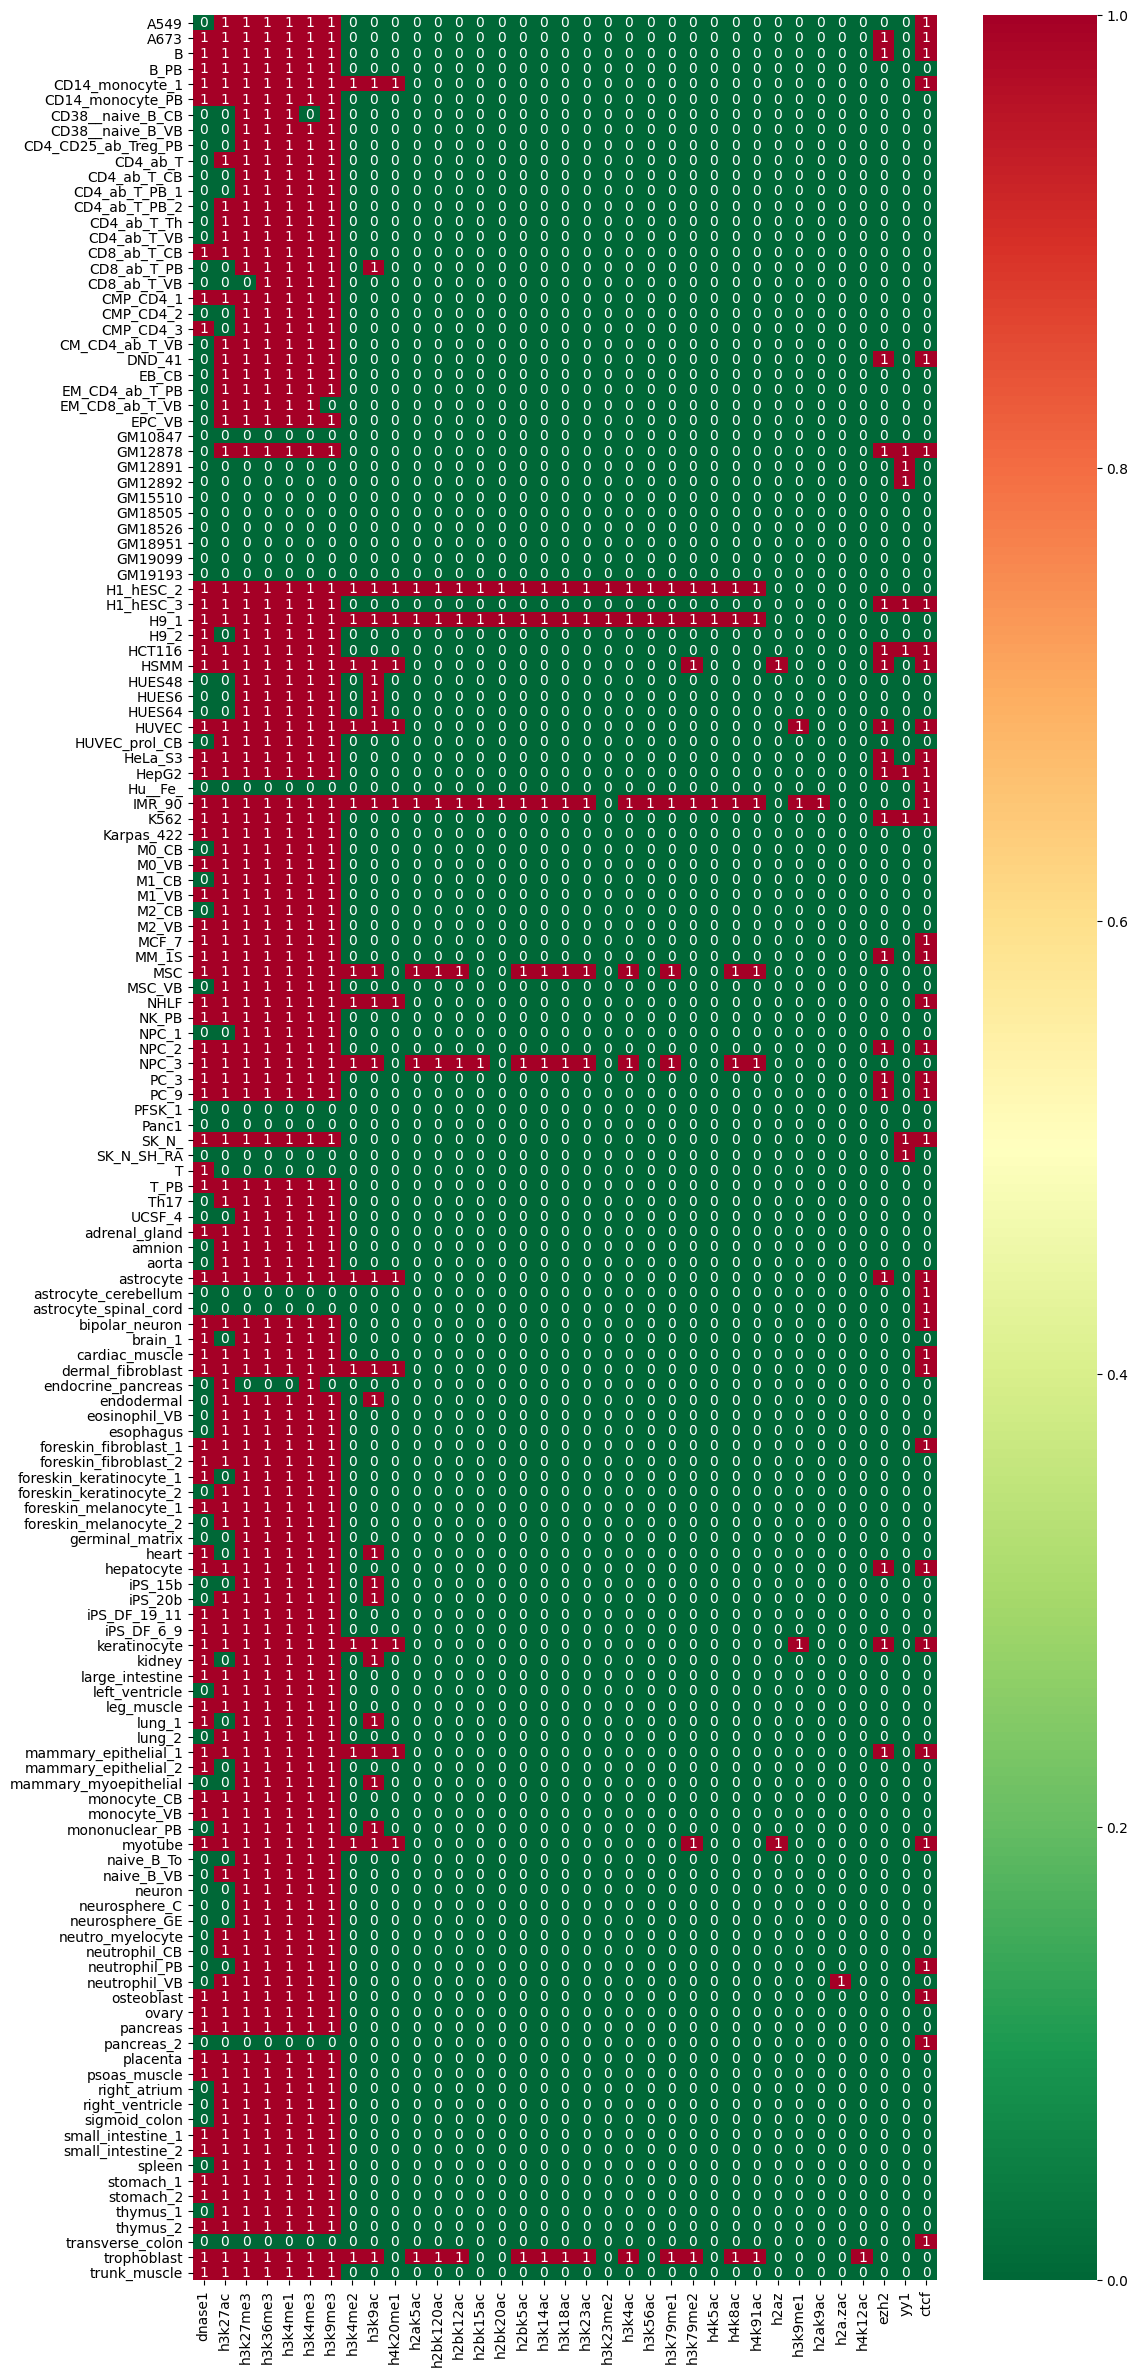

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



factor = 2
fig, ax = plt.subplots(1, 1, figsize = (4*3, 3*10), dpi = 100)

sns.heatmap(df2, cmap='RdYlGn_r', annot=True, ax = ax)
# fig = sns_plot.get_figure()
# fig.savefig("output.svg",  format='svg', dpi=1200, bbox_to_anchor = 'tight')
plt.show()

([<matplotlib.axis.XTick at 0x7f65b3cbe240>,
 [Text(0, 0, 'dnase1'),
  Text(1, 0, 'h3k27ac'),
  Text(2, 0, 'h3k27me3'),
  Text(3, 0, 'h3k36me3'),
  Text(4, 0, 'h3k4me1'),
  Text(5, 0, 'h3k4me3'),
  Text(6, 0, 'h3k9me3'),
  Text(7, 0, 'h3k4me2'),
  Text(8, 0, 'h3k9ac'),
  Text(9, 0, 'h4k20me1'),
  Text(10, 0, 'h2ak5ac'),
  Text(11, 0, 'h2bk120ac'),
  Text(12, 0, 'h2bk12ac'),
  Text(13, 0, 'h2bk15ac'),
  Text(14, 0, 'h2bk20ac'),
  Text(15, 0, 'h2bk5ac'),
  Text(16, 0, 'h3k14ac'),
  Text(17, 0, 'h3k18ac'),
  Text(18, 0, 'h3k23ac'),
  Text(19, 0, 'h3k23me2'),
  Text(20, 0, 'h3k4ac'),
  Text(21, 0, 'h3k56ac'),
  Text(22, 0, 'h3k79me1'),
  Text(23, 0, 'h3k79me2'),
  Text(24, 0, 'h4k5ac'),
  Text(25, 0, 'h4k8ac'),
  Text(26, 0, 'h4k91ac'),
  Text(27, 0, 'h2az'),
  Text(28, 0, 'h3k9me1'),
  Text(29, 0, 'h2ak9ac'),
  Text(30, 0, 'h2a.zac'),
  Text(31, 0, 'h4k12ac'),
  Text(32, 0, 'ezh2'),
  Text(33, 0, 'yy1'),
  Text(34, 0, 'ctcf')])

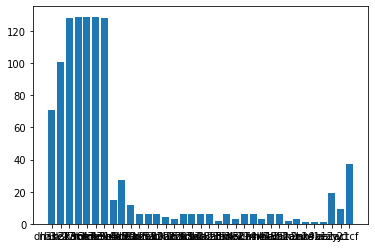

In [8]:
#doing histogram of experiments

#getting freq of exp
histDict = {}
for cell in  finalDict:
    for exp_name in finalDict[cell]:
        if exp_name not in histDict:
            histDict[exp_name] = finalDict[cell][exp_name]
        else:
            histDict[exp_name] += finalDict[cell][exp_name]

            
#getting names
names = list(histDict)
plt.bar(range(len(histDict)), list(histDict.values()), align='center')
plt.xticks(range(len(histDict)), list(histDict.keys()))

In [9]:
#based on the plot, we select subsets of data to know wich cell/tissues I can use with the regulatory features of ensembl
first_data = ['dnase1','h3k27ac','h3k27me3','h3k36me3','h3k4me1','h3k4me3','h3k9me3','ctcf']
second_data = ['dnase1','h3k27ac','h3k27me3','h3k36me3','h3k4me1','h3k4me3','h3k9me3','h3k4me2','h3k9ac','ctcf']
third_data = ['dnase1','h3k27ac','h3k27me3','h3k36me3','h3k4me1','h3k4me3','h3k9me3']
fourth_data = ['dnase1','h3k27ac','h3k27me3','h3k36me3','h3k4me1','h3k4me3','h3k9me3','h3k4me2','h3k9ac']

#list where cells will be append if it have all the data
first_cell = []
second_cell = []
third_cell = []
fourth_cell = []
#now im going to search for these cell lines with all the data
for cell in finalDict:
    count_first = 0
    count_second = 0
    count_third = 0
    count_fourth = 0
    for exp in finalDict[cell]:
        if exp in first_data:
            count_first += finalDict[cell][exp]
        if exp in second_data:
            count_second += finalDict[cell][exp]
        if exp in third_data:
            count_third += finalDict[cell][exp]
        if exp in fourth_data:
            count_fourth += finalDict[cell][exp]
    if count_first == len(first_data):
        first_cell.append(cell)
    if count_second == len(second_data):
        second_cell.append(cell)        
    if count_third == len(third_data):
        third_cell.append(cell)
    if count_fourth == len(fourth_data):
        fourth_cell.append(cell)

print("cells for the first dataset")
print(first_cell)
print("cells for the second dataset")
print(second_cell)
print("cells for the third dataset")
print(third_cell)
print("cells for the fourth dataset")
print(fourth_cell)


cells for the first dataset
['A673', 'B', 'CD14_monocyte_1', 'H1_hESC_3', 'HCT116', 'HSMM', 'HUVEC', 'HeLa_S3', 'HepG2', 'IMR_90', 'K562', 'MCF_7', 'MM_1S', 'NHLF', 'NPC_2', 'PC_3', 'PC_9', 'SK_N_', 'astrocyte', 'bipolar_neuron', 'cardiac_muscle', 'dermal_fibroblast', 'foreskin_fibroblast_1', 'hepatocyte', 'keratinocyte', 'mammary_epithelial_1', 'myotube', 'osteoblast']
cells for the second dataset
['CD14_monocyte_1', 'HSMM', 'HUVEC', 'IMR_90', 'NHLF', 'astrocyte', 'dermal_fibroblast', 'keratinocyte', 'mammary_epithelial_1', 'myotube']
cells for the third dataset
['A673', 'B', 'B_PB', 'CD14_monocyte_1', 'CD14_monocyte_PB', 'CD8_ab_T_CB', 'CMP_CD4_1', 'H1_hESC_2', 'H1_hESC_3', 'H9_1', 'HCT116', 'HSMM', 'HUVEC', 'HeLa_S3', 'HepG2', 'IMR_90', 'K562', 'Karpas_422', 'M0_VB', 'M1_VB', 'M2_VB', 'MCF_7', 'MM_1S', 'MSC', 'NHLF', 'NK_PB', 'NPC_2', 'NPC_3', 'PC_3', 'PC_9', 'SK_N_', 'T_PB', 'adrenal_gland', 'astrocyte', 'bipolar_neuron', 'cardiac_muscle', 'dermal_fibroblast', 'foreskin_fibroblast_

In [10]:
"""date: august 23, 2020"""

'date: august 23, 2020'